<a href="https://colab.research.google.com/github/pswami12/DataScienceFiles/blob/main/Class_8_AIDL_CNN_CIFAR10_Assignment_Sol.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Import Libraries and modules**

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import time

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Add, Activation
from tensorflow.keras.layers import Convolution2D, MaxPooling2D, BatchNormalization
from keras.utils import np_utils

from tensorflow.keras.datasets import cifar10

### Load pre-shuffled CIFAR10 data into train and test sets

In [2]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

170498071/170498071 [==============================] - 3s 0us/step


In [3]:
num_train, img_rows, img_cols, img_channels =  X_train.shape
num_test, _, _, _ =  X_train.shape
num_classes = len(np.unique(y_train))
print(X_train.shape)
print(X_test.shape)

(50000, 32, 32, 3)
(10000, 32, 32, 3)


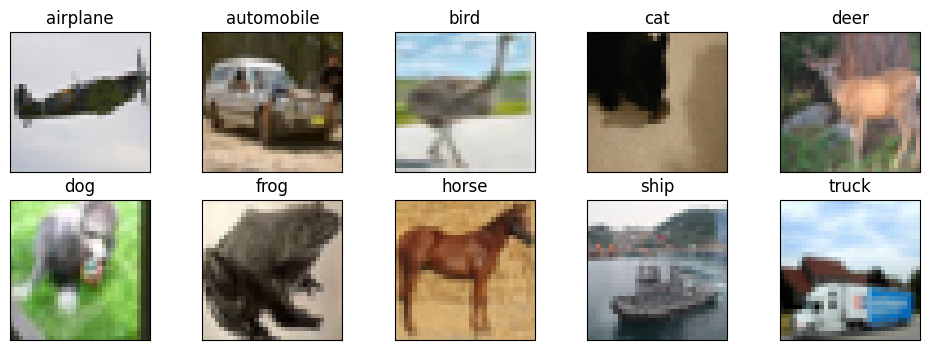

In [4]:
class_names = ['airplane','automobile','bird','cat','deer',
               'dog','frog','horse','ship','truck']
fig = plt.figure(figsize=(12,4))
for i in range(num_classes):
    ax = fig.add_subplot(2, 5, 1 + i, xticks=[], yticks=[])
    idx = np.where(y_train[:]==i)[0]
    features_idx = X_train[idx,::]
    img_num = np.random.randint(features_idx.shape[0])
    im = features_idx[img_num]
    ax.set_title(class_names[i])
    plt.imshow(im)
plt.show()

In [5]:
def plot_model_history(model_history):
    fig, axs = plt.subplots(1,2,figsize=(15,5))
    # summarize history for accuracy
    axs[0].plot(range(1,len(model_history.history['accuracy'])+1),model_history.history['accuracy'])
    axs[0].plot(range(1,len(model_history.history['val_accuracy'])+1),model_history.history['val_accuracy'])
    axs[0].set_title('Model Accuracy')
    axs[0].set_ylabel('Accuracy')
    axs[0].set_xlabel('Epoch')
    axs[0].set_xticks(np.arange(1,len(model_history.history['accuracy'])+1),len(model_history.history['accuracy'])/10)
    axs[0].legend(['train', 'val'], loc='best')
    # summarize history for loss
    axs[1].plot(range(1,len(model_history.history['loss'])+1),model_history.history['loss'])
    axs[1].plot(range(1,len(model_history.history['val_loss'])+1),model_history.history['val_loss'])
    axs[1].set_title('Model Loss')
    axs[1].set_ylabel('Loss')
    axs[1].set_xlabel('Epoch')
    axs[1].set_xticks(np.arange(1,len(model_history.history['loss'])+1),len(model_history.history['loss'])/10)
    axs[1].legend(['train', 'val'], loc='best')
    plt.show()

In [6]:
def accuracy(test_x, test_y, model):
    result = model.predict(test_x)
    predicted_class = np.argmax(result, axis=1)
    true_class = np.argmax(test_y, axis=1)
    num_correct = np.sum(predicted_class == true_class)
    accuracy = float(num_correct)/result.shape[0]
    return (accuracy * 100)

In [7]:
# X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
# X_test = X_test.reshape(X_test.shape[0], 28, 28,1)

In [8]:
(X_train, y_train), (X_test, y_test)
train_features = X_train.astype('float32')/255
test_features = X_train.astype('float32')/255
# convert class labels to binary class labels
y_train = np_utils.to_categorical(y_train, num_classes)
y_test = np_utils.to_categorical(y_test, num_classes)

In [9]:
y_train[:10]


array([[0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [10]:
# Define the model
model = Sequential()
model.add(Convolution2D(32, kernel_size = 3, padding='same', activation='relu', name='conv2d_1st_layer', input_shape=(32, 32, 3)))
model.add(BatchNormalization())
model.add(Dropout(0.15))
model.add(Convolution2D(64, kernel_size = 3, padding='same', name='conv2d_2nd_layer', activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.15))
model.add(Convolution2D(128, kernel_size = 3, padding='same', name='conv2d_3rd_layer', activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.15))


model.add(Convolution2D(32, kernel_size = 1, activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Convolution2D(32, kernel_size = 3, padding='same', name='conv2d_4th_layer', activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.15))
model.add(Convolution2D(64, kernel_size = 3, padding='same', name='conv2d_5th_layer', activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.15))
model.add(Convolution2D(128, kernel_size = 3, padding='same', name='conv2d_6th_layer', activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.15))


model.add(Convolution2D(32, kernel_size = 1, activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Convolution2D(32, kernel_size = 3, padding='same', name='conv2d_7th_layer', activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.15))
model.add(Convolution2D(64, kernel_size = 3, padding='same', name='conv2d_8th_layer', activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.15))
model.add(Convolution2D(128, kernel_size = 3, padding='same', activation='relu', name='conv2d_9th_layer'))
model.add(BatchNormalization())
model.add(Dropout(0.15))


model.add(Convolution2D(10, kernel_size = 1, activation='relu'))
model.add(Convolution2D(10, 8))
model.add(Flatten())
model.add(Activation('softmax'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1st_layer (Conv2D)   (None, 32, 32, 32)        896       
                                                                 
 batch_normalization (BatchN  (None, 32, 32, 32)       128       
 ormalization)                                                   
                                                                 
 dropout (Dropout)           (None, 32, 32, 32)        0         
                                                                 
 conv2d_2nd_layer (Conv2D)   (None, 32, 32, 64)        18496     
                                                                 
 batch_normalization_1 (Batc  (None, 32, 32, 64)       256       
 hNormalization)                                                 
                                                                 
 dropout_1 (Dropout)         (None, 32, 32, 64)        0

In [12]:
def get_random_eraser(p=0.5, s_l=0.02, s_h=0.4, r_1=0.3, r_2=1/0.3, v_l=0, v_h=255, pixel_level=False):
    def eraser(input_img):
        img_h, img_w, img_c = input_img.shape
        p_1 = np.random.rand()

        if p_1 > p:
            return input_img

        while True:
            s = np.random.uniform(s_l, s_h) * img_h * img_w
            r = np.random.uniform(r_1, r_2)
            w = int(np.sqrt(s / r))
            h = int(np.sqrt(s * r))
            left = np.random.randint(0, img_w)
            top = np.random.randint(0, img_h)

            if left + w <= img_w and top + h <= img_h:
                break

        if pixel_level:
            c = np.random.uniform(v_l, v_h, (h, w, img_c))
        else:
            c = np.random.uniform(v_l, v_h)

        input_img[top:top + h, left:left + w, :] = c

        return input_img

    return eraser

In [15]:
from keras.optimizers import Adam
from keras.callbacks import LearningRateScheduler
from keras.callbacks import ModelCheckpoint

def scheduler(epoch, lr):
  return round(0.003 * 1/(1 + 0.319 * epoch), 10)

model.compile(loss='categorical_crossentropy', optimizer=Adam(lr=0.003), metrics=['accuracy'])

In [ ]:
# checkpoint
filepath="best_model.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')

from keras.preprocessing.image import ImageDataGenerator

datagen_train = ImageDataGenerator(zoom_range=0.0,horizontal_flip=False,
                             featurewise_center=True, featurewise_std_normalization=True,preprocessing_function=get_random_eraser(v_l=0, v_h=1,pixel_level=True))

datagen_test = ImageDataGenerator(featurewise_center=True, featurewise_std_normalization=True)
iterator_test = datagen_test.flow(X_test, y_test, batch_size=len(test_features), shuffle=False)
X_test_2, y_test_2 = iterator_test.next()

# train the model
start = time.time()
# Train the model
model_info = model.fit(datagen_train.flow(X_train, y_train, batch_size = 128),
                                 epochs = 100,
                                 validation_data = (X_test_2, y_test_2), verbose=1,
                                 callbacks=[checkpoint,LearningRateScheduler(scheduler, verbose=1)])
end = time.time()
print ("Model took %0.2f seconds to train"%(end - start))
# plot model history
# plot_model_history(model_info)
# compute test accuracy
model.load_weights('best_model.hdf5')
print ("Accuracy on test data is: %0.2f"%accuracy(X_test, y_test, model))


Epoch 1: LearningRateScheduler setting learning rate to 0.003.
Epoch 1/100
391/391 [==============================] - ETA: 0s - loss: 1.6285 - accuracy: 0.4078
Epoch 1: val_accuracy improved from -inf to 0.45270, saving model to best_model.hdf5
391/391 [==============================] - 38s 66ms/step - loss: 1.6285 - accuracy: 0.4078 - val_loss: 1.6613 - val_accuracy: 0.4527 - lr: 0.0030

Epoch 2: LearningRateScheduler setting learning rate to 0.0022744503.
Epoch 2/100
391/391 [==============================] - ETA: 0s - loss: 1.2072 - accuracy: 0.5664
Epoch 2: val_accuracy improved from 0.45270 to 0.56350, saving model to best_model.hdf5
391/391 [==============================] - 24s 62ms/step - loss: 1.2072 - accuracy: 0.5664 - val_loss: 1.2529 - val_accuracy: 0.5635 - lr: 0.0023

Epoch 3: LearningRateScheduler setting learning rate to 0.0018315018.
Epoch 3/100
391/391 [==============================] - ETA: 0s - loss: 1.0120 - accuracy: 0.6382
Epoch 3: val_accuracy improved from 0.

In [ ]:
score = model.evaluate(X_test, y_test, verbose=0)
print(score)

[0.485485702753067, 0.8492000102996826]


In [ ]:
y_pred = model.predict(X_test)

313/313 [==============================] - 1s 4ms/step


In [ ]:
y_pred[0]

array([2.8470326e-06, 3.4366420e-07, 1.1111320e-06, 8.7259769e-01,
       5.7831400e-08, 1.2695840e-01, 4.3891466e-04, 3.3565200e-07,
       1.9092754e-08, 1.7020514e-07], dtype=float32)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: MatplotlibDeprecationWarning: Passing the minor parameter of set_xticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: MatplotlibDeprecationWarning: Passing the minor parameter of set_xticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.


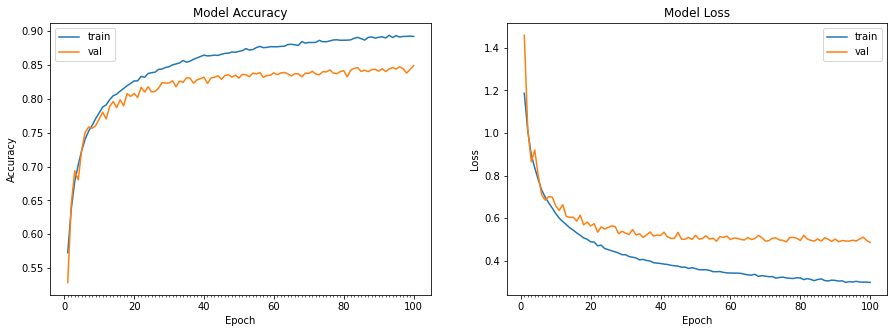

In [ ]:
plot_model_history(model_info)

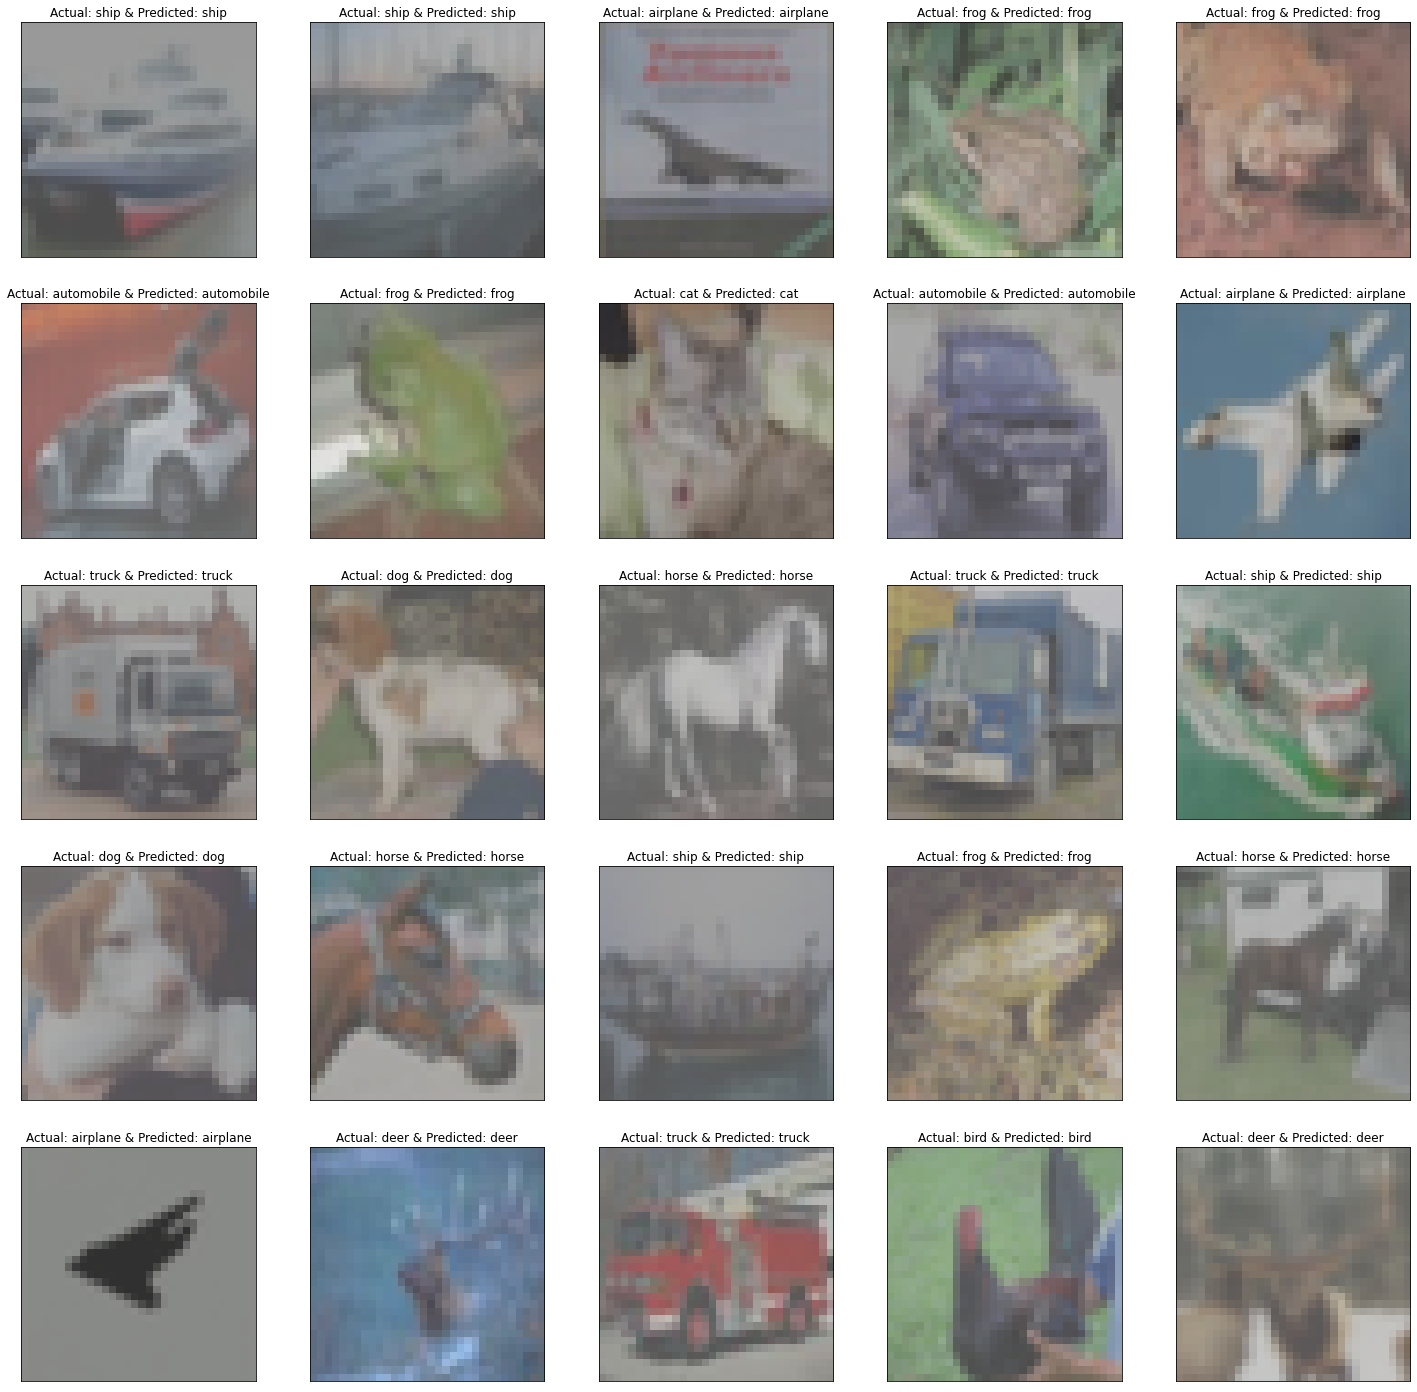

In [ ]:
# getting index of all misclasified images
img_index = []
for i in range(1,X_test.shape[0]):
  if np.argmax(y_pred[i])==np.argmax(y_test[i]):
    img_index.append(i)

    # function to reconvert image array to an 0-255 scale
def image_reconstract(x):
    # normalize tensor: center on 0., ensure std is 0.1
    x -= x.mean()
    x /= (x.std() + 1e-5)
    x *= 0.1

    # clip to [0, 1]
    x += 0.5
    x = np.clip(x, 0, 1)

    # convert to RGB array
    x *= 255
    #x = x.transpose((1, 2, 0))
    x = np.clip(x, 0, 255).astype('uint8')
    return x

# Storing 25 misclassified images into a variable after converting them  into 0-255 scale. Also, storing actual and predicted output values for those images
img_actual = []
img_actual_value = []
img_pred_value = []
for i in range(1,26):
    img_req = np.array(X_test[img_index[i-1]]).reshape((32, 32, 3)).astype(np.float64)
    img_req = image_reconstract(img_req).reshape((32, 32, 3))
    img_actual.append(img_req)
    img_actual_value.append(np.argmax(y_test[img_index[i-1]]))
    img_pred_value.append(np.argmax(y_pred[img_index[i-1]]))

# Plotting all 25 images
row = 5
col = 5
fig=plt.figure(figsize=(25, 25))
class_names = ['airplane','automobile','bird','cat','deer',
               'dog','frog','horse','ship','truck']
for i in range(0,row*col):
  fig.add_subplot(row,col,i+1)
  plt.imshow(img_actual[i])
  plt.title('Actual: '+str(class_names[img_actual_value[i]])+' & Predicted: '+str(class_names[img_pred_value[i]]))
  plt.xticks([])
  plt.yticks([])
plt.show()